# Proyek Analisis Data: **BIKE SHARING DATASET**

- **Nama:** Putri Daliana Salsabilla Rais
- **Email:** putridaliana@gmail.com
- **ID Dicoding:** pptrais



**BIKE SHARING DATASET**
---
---

\
Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal

\

---

**Latar Belakang**

---
Sistem **Bike Sharing** adalah generasi baru dari penyewaan sepeda tradisional di mana seluruh proses mulai dari keanggotaan, penyewaan, dan pengembalian kembali telah menjadi otomatis.

Melalui sistem ini, pengguna dapat dengan mudah menyewa sepeda dari posisi tertentu dan kembali kembali ke posisi lain. Saat ini, terdapat lebih dari 500 program **Bike Sharing** di seluruh dunia yang terdiri dari lebih dari 500 ribu sepeda. Saat ini, terdapat minat yang besar terhadap sistem ini karena peran pentingnya dalam lalu lintas, masalah lingkungan dan kesehatan.

Terlepas dari aplikasi dunia nyata yang menarik dari sistem **Bike Sharing**, karakteristik data yang dihasilkan oleh sistem ini menjadikannya menarik untuk penelitian ini. Dibandingkan dengan layanan transportasi lain seperti bus atau kereta bawah tanah, durasi perjalanan, posisi keberangkatan dan kedatangan secara eksplisit dicatat dalam sistem ini.

Fitur ini mengubah sistem **Bike Sharing** menjadi jaringan sensor virtual yang dapat digunakan untuk merasakan mobilitas di dalam kota. Oleh karena itu, diharapkan bahwa sebagian besar kejadian di kota dapat dideteksi melalui pemantauan data ini.


\


---

**Data Set**

---
Proses penyewaan sepeda bersama sangat berkorelasi dengan kondisi lingkungan dan musim. Misalnya, kondisi cuaca, curah hujan, hari dalam seminggu, musim, jam dalam sehari, dan lain-lain dapat mempengaruhi perilaku penyewaan. Kumpulan data inti terkait dengan catatan historis dua tahun yang sesuai dengan tahun 2011 dan 2012 dari sistem Capital Bikeshare, Washington D.C., Amerika Serikat, yaitu tersedia untuk umum di http://capitalbikeshare.com/system-data.

Kami mengumpulkan data dalam dua basis per jam dan per hari dan kemudian diekstrak dan menambahkan informasi cuaca dan musim yang sesuai.
Informasi cuaca diekstrak dari http://www.freemeteo.com.

\


---

**Associated Tasks**

---
- **Regresi:**

  ​Prediksi jumlah penyewaan sepeda per jam atau per hari berdasarkan pengaturan lingkungan dan musim.
​
- **Deteksi Peristiwa dan Anomali:**  

  ​Jumlah sepeda yang disewa juga berkorelasi dengan beberapa acara di kota yang dapat dengan mudah dilacak melalui mesin pencari.

  **​Misalnya**, kueri seperti "2012-10-30 washington d.c." di Google mengembalikan hasil yang terkait dengan Badai Sandy.  
  ​Beberapa peristiwa penting diidentifikasi dalam [1].
  
  **​Oleh karena itu,** data tersebut juga dapat digunakan untuk validasi algoritme pendeteksi anomali atau peristiwa.

\


---

**File**

---
- Readme.txt
- **hour.csv:** jumlah pengguna sepeda yang diagregasi per jam. (Catatan 17379 jam)
- **day.csv** - jumlah pengguna sepeda yang diagregasi setiap hari. (Catatan 731 hari)















## Menentukan Pertanyaan Bisnis

- **Pertanyaan 1:** Bagaimana dampak dari kondisi cuaca terhadap penggunaan layanan bike sharing?
- **Pertanyaan 2:** Tingkat peminjaman sepeda terendah terjadi di musim apa?

## Import Semua Packages/Library yang Digunakan

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
import calendar


*   Melakukan import library NumPy untuk mempercepat proses komputasi numerik dalam python dan dapat membuat juga mengelola multi-dimensional arrays.
*   Library Pandas dapat digunakan untuk memanipulasi dan menganalisis data, di mana dalam proyek kali ini Pandas digunakan sebagai tool utama dalam menganalisis data.
*   Library Matplotib digunakan untuk pembuatan visualisasi data statis, animated, dan interaktif.
*   Library Seaborn digunakan untuk visualisasi data yang atraktif dan informatif, sehingga dapat menampilkan grafi visualisasi data.




*   Import calendar untuk memberikan nama hari sesuai dengan rentang waktu hari Senin sampai dengan hari Minggu. (digunakan pada tahap cleaning data).



## Data Wrangling

### Gathering Data

In [122]:
url= 'https://raw.githubusercontent.com/putriraiss/Proyek-Analisis-Data/main/data/day.csv'
df= pd.read_csv(url)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Memasukkan data Bike-Sharing-Dataset ke dalam gathering data menggunakan command "url" karena ingin menggunakan raw data "table day" yang diambil dari repository github yang sudah saya buat sebelumnya.




---
**Karakteristik Dataset**

---
	- instant: record index
	- dteday : tanggal
	- season : musim (1:springer (semi), 2:summer (musim panas), 3:fall (gugur), 4:winter(musim dingin))
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1 (Jika hari tersebut bukan weekend atau hari libur maka nilainya adalah 1/true), otherwise is 0 (Jika tidak bernilai 0/false).
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users (jumlah pengguna kasual)
	- registered: count of registered users (Jumlah pengguna terdaftar)
	- cnt: count of total rental bikes including both casual and registered (jumlah total sepeda yang disewakan termasuk pengguna sosial dan terdaftar)




### Assessing Data

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


memeriksa tipe data data apa saja dari tiap kolom yang terdapat dalam tabel day di atas.

In [124]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Memeriksa apakah terdapat "missing values" pada tabel day.
Terlihat dari output di atas bahwa semua kolom di dalam table day tidak ada satupun yang terdapat missing value.

In [125]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


Memeriksa apakah dari table day dengan menghitung total data yang terdapat duplikasi, namun pada output di atas dapat dilihat bahwa tidak ada data yang terduplikasi dalam tabel day.

In [126]:
df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Menampilkan ringkasan parameter statistik (mean, median, dll.) dari table day

### Cleaning Data

In [127]:
df['yr'] = df['yr'].replace({0: 2011, 1: 2012})
print(df.dtypes['yr'])

print(df.head())
print(df.tail())

int64
   instant      dteday  season    yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1  2011     1        0        6           0   
1        2  2011-01-02       1  2011     1        0        0           0   
2        3  2011-01-03       1  2011     1        0        1           1   
3        4  2011-01-04       1  2011     1        0        2           1   
4        5  2011-01-05       1  2011     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
     ins

Karena pada data sebelumnya nilai pada **kolom "yr"** yang menggunakan tipe data integer dengan nilai **0** dan **1**.

Maka pada tahap cleaning data saya mengganti nilai di **kolom** **yr** menjadi tahun **2011** dan **2012**, sesuai dengan informasi keterangan tahun di kolom "dteday".

Hal ini dilakukan untuk mempermudah dalam membaca dan menganalisis data.

In [128]:
df['season']= df['season'].replace({1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"})
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Melakukan cleaning data dengan mengubah nilai data pada kolom "season" yang sebelumnya range 1-4 yang menjadi penanda jenis musim menjadi:
1.   (1) --> Spring
2.   (2) --> Summer
1.   (3) --> Fall
2.   (4) --> Winter

Hal ini dilakukan untuk mempermudah orang lain untuk membaca data ketika dilakukan visualisasi data.



In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    object 
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(10), object(2)
memory usage: 91.5+ KB


In [130]:
df['weathersit'] = df['weathersit'].replace({1: "Cerah", 2: "Berawan", 3: "Salju dan hujan ringan", 4: "cuaca extrem"})
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,1,0,6,0,Berawan,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,1,0,0,0,Berawan,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,1,0,1,1,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,1,0,2,1,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,1,0,3,1,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengubah nilai pada kolom wheatersit yang mulanya cuaca ditandai dengan range nomor 1-4 diganti menjadi kesimpulan inti cuaca, sesuai dengan ketentuan Read.me sebelumnya:


*   1: Clear, Few clouds, Partly cloudy, Partly cloudy (Cerah)
*   2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist (Berawan)
*   3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds (Salju dan hujan ringan)
*   4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog (Extrem)

Terlihat wheatersit sudah berubah yang tadinya angka menjadi text untuk mempermudah membaca data.

## Exploratory Data Analysis (EDA)

### Explore ...

**Weather**

In [131]:
weather_info = df[['weathersit', 'casual', 'registered', 'cnt']]
weather_info


,weathersit,casual,registered,cnt
0,Berawan,331,654,985
1,Berawan,131,670,801
2,Cerah,120,1229,1349
3,Cerah,108,1454,1562
4,Cerah,82,1518,1600
...,...,...,...,...
726,Berawan,247,1867,2114
727,Berawan,644,2451,3095
728,Berawan,159,1182,1341
729,Cerah,364,1432,1796


Menampilkan table baru dengan nama "weather_info" dengan isian kolom wheatersit, casual, registered, dan cnt saja.

In [132]:
weather_sum = weathersit_info.groupby('weathersit').sum().reset_index()
weather_sum


,weathersit,casual,registered,cnt
0,Berawan,169776,827082,996858
1,Cerah,446346,1811606,2257952
2,Salju dan hujan ringan,3895,33974,37869


Menjumlahkan pengguna casual, registered, dan cnt (total keduanya) sesuai tiap cuaca yang ada.

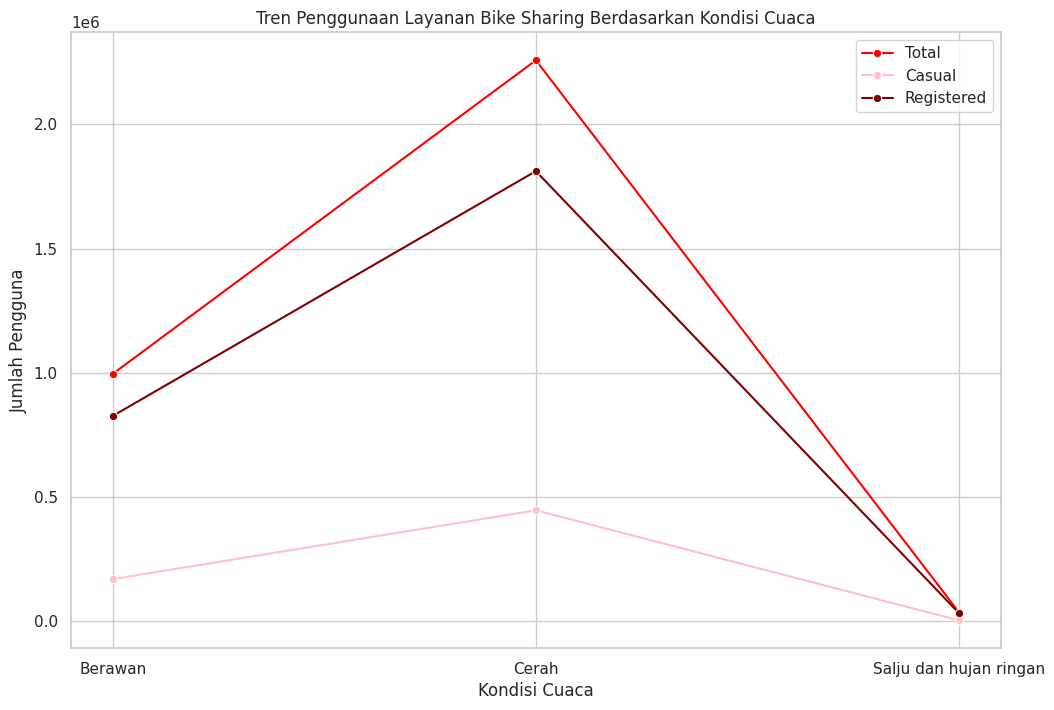

In [146]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='weathersit', y='cnt', data=weather_sum, marker='o', label='Total', color='Red')
sns.lineplot(x='weathersit', y='casual', data=weather_sum, marker='o', label='Casual', color='pink')
sns.lineplot(x='weathersit', y='registered', data=weather_sum, marker='o', label='Registered', color='maroon')

plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna')
plt.title('Tren Penggunaan Layanan Bike Sharing Berdasarkan Kondisi Cuaca')
plt.legend()

plt.show()

Membuat diagram grafik line untuk melihat perubahan grafik jumlah pengguna (casual, registered, dan keduanya) sesuai cuaca.

**Season**

In [134]:
seasonal_info = df[['season', 'casual','registered', 'cnt']]
seasonal_info

,season,casual,registered,cnt
0,Spring,331,654,985
1,Spring,131,670,801
2,Spring,120,1229,1349
3,Spring,108,1454,1562
4,Spring,82,1518,1600
...,...,...,...,...
726,Spring,247,1867,2114
727,Spring,644,2451,3095
728,Spring,159,1182,1341
729,Spring,364,1432,1796


Membuat table baru dengan nama "seasonal_info" untuk menampilkan kolom season, casual, registered, dan count saja.

In [173]:
total_users_per_season = df.groupby('season')[['casual', 'registered', 'cnt']].sum().reset_index()
total_users_per_season

,season,casual,registered,cnt
0,Fall,226091,835038,1061129
1,Spring,60622,410726,471348
2,Summer,203522,715067,918589
3,Winter,129782,711831,841613


Menjumlahkan pengguna casual, registered, dan cnt (total keduanya) sesuai tiap season yang ada.

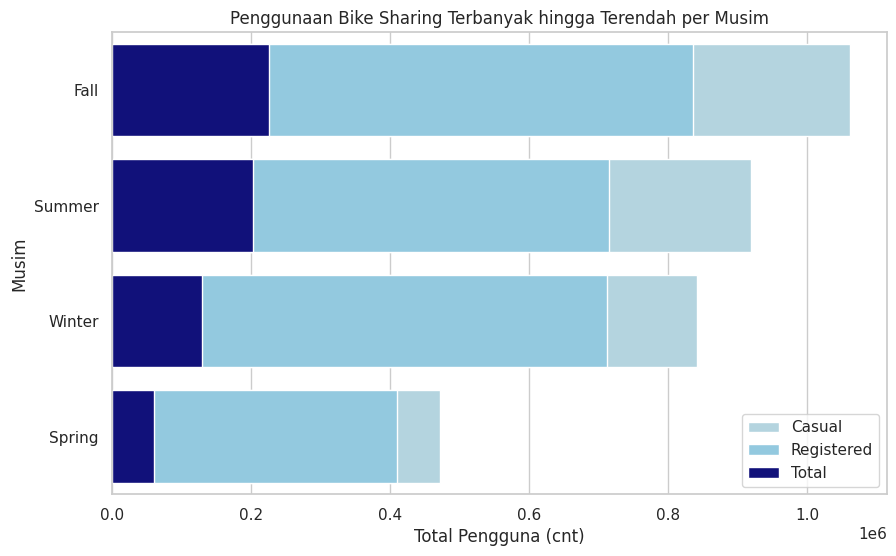

In [141]:
plt.figure(figsize=(10, 6))

sns.barplot(x='cnt', y='season', data=total_users_per_season_sorted, label='Casual', color='lightblue')
sns.barplot(x='registered', y='season', data=total_users_per_season_sorted, label='Registered', color='skyblue')
sns.barplot(x='casual', y='season', data=total_users_per_season_sorted, label='Total', color='darkblue')

plt.title('Penggunaan Bike Sharing Terbanyak hingga Terendah per Musim')
plt.xlabel('Total Pengguna (cnt)')
plt.ylabel('Musim')
plt.legend()
plt.show()

Menampilkan grafik bar untuk melihat banyaknya pengguna yang menggunakan bike-sharing tiap musimnya.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana dampak dari kondisi cuaca terhadap penggunaan layanan bike sharing?



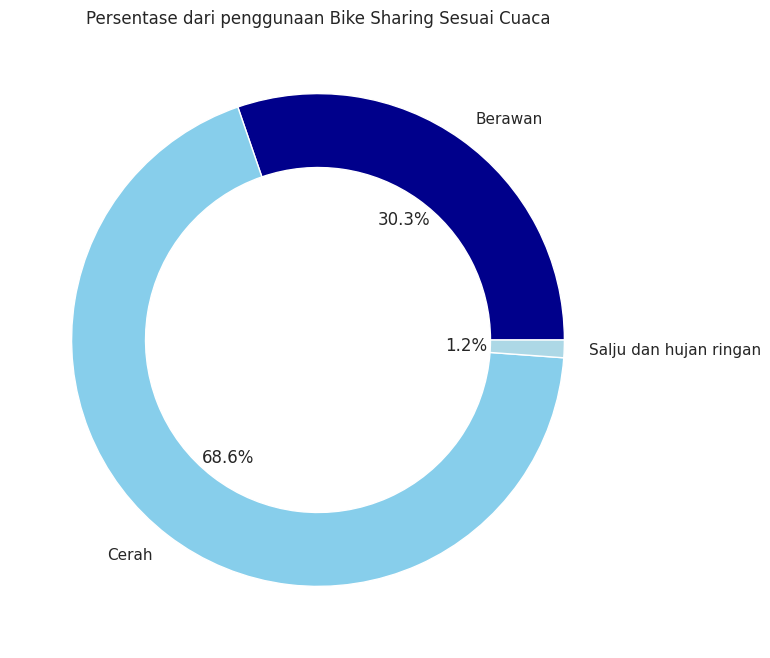

In [167]:
weather_sum.index = ['Berawan', 'Cerah', 'Salju dan hujan ringan']
total_rentals = weather_sum['cnt'].sum()
proportions = weather_sum['cnt'] / total_rentals
colors = ('darkblue', 'skyblue', 'lightblue')
explode = (0.2, 0.1, 0.1)

plt.figure(figsize=(8, 8))
plt.pie(
    proportions,
    labels=weather_sum.index,
    autopct='%1.1f%%',
    colors=colors,
    wedgeprops = {'width': 0.3}

)
plt.title('Persentase dari penggunaan Bike Sharing Sesuai Cuaca')
plt.show()

Diagram di atas menampilkan persentase peminjaman sepeda dari seluruh jumlah pengguna casual dan registered di cuaca yang berbeda dan hasilnya dapat menjawab pertanyaan di atas yaitu peminjaman sepeda memang terpengaruh oleh kondisi cuaca. Seperti yang terlihat pada diagram di atas banyak yang menggunakan layanan bike-sharing ketika kondisi cuaca dominan cerah, sedangkan pada musim salju & hujan ringan sangat sedikit yang menggunakan layanan bike-sharing.

### Pertanyaan 2:

Pertanyaan 2: Tingkat peminjaman sepeda terendah terjadi di musim apa?

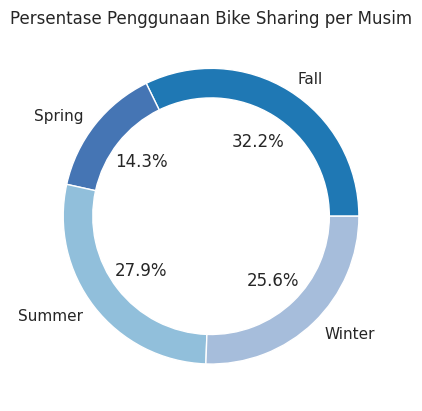

In [177]:
total_users_per_season = df.groupby('season')['cnt'].sum().reset_index()
total_rentals = total_users_per_season['cnt'].sum()
proportions = total_users_per_season['cnt'] / total_rentals
colors = ('#1f78b4', '#4575b4', '#91bfdb', '#a6bddb' )
explode = (0.2, 0.1, 0.1, 0.1)

plt.pie(
    x=proportions,
    labels=total_users_per_season['season'],
    autopct='%1.1f%%',
    colors=colors,
    wedgeprops = {'width': 0.2}
)
plt.title('Persentase Penggunaan Bike Sharing per Musim')
plt.show()


Diagram di atas menampilkan presentase dari kondisi empat musim yang ada, yaitu Fall, Spring, Summer, dan Winter. Dari data di atas saya dapat menjawab pertanyaan kedua yaitu pengguna jarang menggunakan layanan bike sharing pada musim "Spring" terlihat dari gambar diagram di atas bahwa musim "Spring" / "Semi" sangat sedikit yang meminjam sepeda. Sedangkan layanan bike-sharing sering digunakan pada musim "Fall" / "Gugur" terlihat dari banyaknya presentase yang ditampilkan.

## Conclusion

In [179]:
df.to_csv("all_data.csv", index=False)

dilakukan untuk menyimpan data dan agar dapat mendownload berkas data tersebut.

- Pertanyaan 1 yaitu "Bagaimana dampak dari kondisi cuaca terhadap penggunaan layanan bike sharing?" dapat dijawab dengan jawaban iya sangat berdampak terhadap penggunaan layanan bike sharing dikarenakan jika melihat pada diagram di atas dapat disimpulkan banyak pengguna yang lebih suka menggunakan layanan tersebut ketika cuaca sedang cerah dengan presentase pengguna sebanyak 68.6%,  begitupula sebaliknya banyak yang tidak menggunakan layanan bike-sharing ketika cuaca sedang salju atau hujan ringan dengan presentase hanya sebesar 1.2%.
- Pertanyaan 2 yaitu "Tingkat peminjaman sepeda terendah terjadi di musim apa?" dapat dijawab dan dapat disimpulkan bahwa peminjaman sepeda terendah terjadi pada musim "spring" / "semi", hal tersebut dapat dibuktikan dengan jumlah presentase diagram di atas di mana spring hanya sebesar 14.3%. Sedangkan untuk pengguna terbanyak menggunakan layanan bike-sharing ialah pada musim "Fal" / "gugur" dengan presentase sebesar 32.2%.